# Import Libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Define the XOR Data Set

In [2]:

X = np.array([
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
    [0, 0, 1],
])

y = np.array([[0],
              [1],
              [1],
              [0]
             ])

# Define Parameters

In [3]:
# Learning Rate
eta = 3

# Number of epochs for learning
epochs = 1000

# Number of Hidden Neurons
hidden = 10

# Drop out rate probability (drp = 1 means no dropout)
drp = 0.5

# Define Functions

In [4]:
def sigmoid(x, derivative=False):
    if derivative:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

In [5]:
def feedforward(X,mode,k=drp):
    # When training (mode="0") Drop out applies for the hidden layer outputs a_h
    if mode == 0:
        #print("Testing mode activated")
        z_h = np.dot(X, w01)
        a_h = sigmoid(z_h)
        #print("a_h before drop out:", a_h)
        r = np.random.binomial(size=a_h.shape,n=1,p=k)
        a_h *= r
        #print("a_h AFTER drop out, a_h:", a_h)
        #print("\n")
        z_o = np.dot(a_h, w12)
        a_o = sigmoid(z_o)
    
    # When Testing (mode = "1") we use the normal weights w12 (not scaled with p)
    elif mode == 1:
        #print("Training mode activated")
        z_h = np.dot(X, w01)
        a_h = sigmoid(z_h)
        z_o = np.dot(a_h, w12)
        a_o = sigmoid(z_o)
    else:
        print("Must specify 2nd argument '0' for Training or '1' for Test")
        
    return(a_o,a_h)

In [6]:
#test = np.random.rand(*a_h.shape) < drp

In [7]:
#test.shape
#a_h*test

# Initialize the weights

In [8]:
w01 = np.random.random((len(X[0]), hidden))
w12 = np.random.random((hidden, 1))

w01_list = []
w12_list = []
#r = np.random.binomial(size=a_h.shape, n=1, p= 0.5)
#r.shape
#w12.shape


## Start feeding forward and backpropagate *epochs* times.

In [9]:
E_o = []
for epoch in range(epochs):
    a_o, a_h = feedforward(X,0,drp)
    
    # Calculate the error
    a_o_error = ((1 / 2) * (np.power((a_o - y), 2)))
    #print("******** Error after ", epoch, "epochs is ", sum(a_o_error), "*********")
    #print(sum(a_o_error))
    E_o = np.append(E_o, sum(a_o_error))
    
    
    # Backpropagation
    ## Output to Hidden Layer weights
    delta_E_o = a_o - y
    delta_a_o = sigmoid(a_o,derivative=True)
    delta_z_o = a_h
    delta_E_w12 = np.dot(delta_z_o.T,(delta_E_o * delta_a_o))
    

    ## Hidden to Input Layer weights
    delta_E_h = np.dot(delta_E_o * delta_a_o, w12.T)
    delta_a_h = sigmoid(a_h,derivative=True)
    delta_z_h = X
    delta_E_w01 = np.dot(delta_z_h.T, delta_E_h * delta_a_h)
    

    # Store All weights throughout learning
    w01_list.append(w01)
    w12_list.append(w12)

    # Adjust weights
    w01 = w01 - eta * delta_E_w01
    w12 = w12 - eta * delta_E_w12
    


In [10]:
#a_h_r

# Checking dimensions across calculations

In [11]:
    print("")
    print("E_o dimension is ", delta_E_o.shape)
    print("delta_a_o dimension is ", delta_a_o.shape)
    print("delta_z_o dimension is ", delta_z_o.shape)
    print("delta_E_o times delta_a_o dimension is ", (delta_E_o * delta_a_o).shape)
    print("delta_z_o Transpose dimension is", (delta_z_o.T).shape)
    print("Output layer dimension is ", delta_E_w12.shape)
    print("")
    print("delta_E_o times delta_a_o dimension is ", (delta_E_o * delta_a_o).shape)
    print("w12 Transpose dimension is", (w12.T).shape)    
    print("delta_E_h dimension is ", delta_E_h.shape)
    print("delta_a_h dimension is ", delta_a_h.shape)
    print("delta_z_h dimension is ", delta_z_h.shape)
    print("Hidden Layer dimension is ", delta_E_w01.shape)


E_o dimension is  (4, 1)
delta_a_o dimension is  (4, 1)
delta_z_o dimension is  (4, 10)
delta_E_o times delta_a_o dimension is  (4, 1)
delta_z_o Transpose dimension is (10, 4)
Output layer dimension is  (10, 1)

delta_E_o times delta_a_o dimension is  (4, 1)
w12 Transpose dimension is (1, 10)
delta_E_h dimension is  (4, 10)
delta_a_h dimension is  (4, 10)
delta_z_h dimension is  (4, 3)
Hidden Layer dimension is  (3, 10)


In [12]:
#a_h.shape
#r.shape
#r = np.random.binomial(size=a_h.shape,n=1,p=drp)
#r

# Neural Network weights

### Iterating through Epochs and storing learned weights evolution

In [13]:
w01_curve = []
for i in range(w01.shape[0]):
    for j in range(w01.shape[1]):
        for x in range(len(w01_list)):
            #print(w01_list[x][i][j])
            w01_curve.append(w01_list[x][i][j])
            #print("Weights w[",x,"],[",i,"],[",j,"] stored")

### Plotting weights as the NN learns

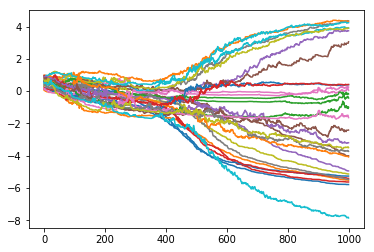

In [14]:
numberOfWeights = w01.shape[1]*w01.shape[0]
for k in range(numberOfWeights):
    t= w01_curve[(epochs*k):(epochs*(k+1)-1)]
    plt.plot(t)

## Final trained Weights

In [15]:
print("Input-Hidden Layer weights w01:\n",w01)
print("\nHidden-Output Layer weights w12:\n",w12)


Input-Hidden Layer weights w01:
 [[-5.79486539e+00 -5.51647901e+00 -5.26234729e-01 -5.62797634e+00
   3.73678537e+00 -4.00550097e+00 -1.33271954e-03  4.37613270e+00
  -5.13166038e+00  3.93845598e+00]
 [-5.26219911e+00  4.31591536e+00 -1.74325485e-01 -5.40189748e+00
  -4.94145649e+00  3.05323065e+00  2.51416748e-01 -5.46822877e+00
   3.90621215e+00  4.27340030e+00]
 [ 3.94407615e-01 -4.07300691e+00 -1.10239138e+00  4.13968635e-01
  -3.19579980e+00 -2.41335936e+00 -1.68302502e+00 -3.70453174e+00
  -3.49963432e+00 -7.81760504e+00]]

Hidden-Output Layer weights w12:
 [[-4.91742962]
 [ 3.62803087]
 [-1.29233152]
 [-4.85109627]
 [ 3.44861534]
 [ 2.72520269]
 [-0.69203056]
 [ 3.94942395]
 [ 3.46758358]
 [-4.36481859]]



# Plot Error

Minimum Error achieved: 0.00126182617684436
Epochs run: 1000
Hidden neurons 10
Learning Rate: 3


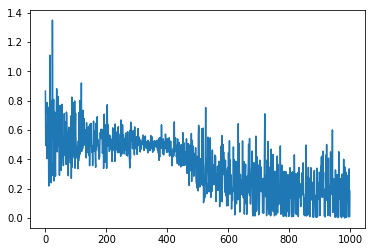

In [16]:

print("Minimum Error achieved:", min(E_o)) 
print("Epochs run:", epochs)
print("Hidden neurons",hidden)
print("Learning Rate:",eta)
   
plt.plot(E_o)
#plt.axis([0, epochs, 0, 100])
plt.show()

# Testing Run: Learned XOR Output

In [17]:
a_o, a_h = feedforward(X,1)
print(a_o)

[[0.06242052]
 [0.9871557 ]
 [0.99499415]
 [0.00342403]]
